## Load Packages and Data

In [1]:
from model.utils import *
from model.gnn import *
from model.node2vec import *
from model.bert_embeddings import *

# Set the seeds for reproducibility
set_seeds(42)

### Preprocess the dataset to assign unique IDs to citation texts and generate necessary embeddings:

In [2]:
# Load and preprocess the data
df = data_preprocess('data/full_context_PeerRead.csv')
df.head(5)

,right_citated_text,left_citated_text,source_abstract,source_author,source_id,source_title,source_venue,source_year,target_id,target_author,target_abstract,target_year,target_title,target_venue,citated_text,citated_text_id
0,andsyntactic parsing .Because RNNs make very f...,We conducted additional experiments on artific...,Deep Neural Networks (DNNs) are powerful model...,ilya sutskever;oriol vinyals;quoc v le,1409.3215v1,Sequence to Sequence Learning with Neural Netw...,NIPS,2014.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL,We conducted additional experiments on artific...,0
1,.Because RNNs make very few domain-specific as...,We conducted additional experiments on artific...,Syntactic parsing is a fundamental problem in ...,oriol vinyals;lukasz kaiser;terry koo;slav pet...,1412.7449v1,Grammar as a Foreign Language,NIPS,2014.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL,We conducted additional experiments on artific...,0
2,"; in a Pointer Network,the only way to generat...","Reproducibility. All code, data, and experimen...",We introduce a new neural architecture to lear...,oriol vinyals;meire fortunato;navdeep jaitly,1506.03134v1,Pointer Networks,NIPS,2015.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL,"Reproducibility. All code, data, and experimen...",1
3,". Recently, nsur . have shown superior perfor...","st like CWS and POS tagging, automatic prosody...",The recently introduced continuous Skip-gram m...,tomas mikolov;ilya sutskever;kai chen 0010;gre...,1310.4546v1,Distributed Representations of Words and Phras...,NIPS,2013.0,1511.00360v1,chuang ding;lei xie;jie yan;weini zhang;yang liu,Prosody affects the naturalness and intelligib...,2015,Automatic Prosody Prediction for Chinese Speec...,arxiv,"st like CWS and POS tagging, automatic prosody...",2
4,model trained on the Google News dataset3.In a...,We begin by considering a document as the set ...,The recently introduced continuous Skip-gram m...,tomas mikolov;ilya sutskever;kai chen 0010;gre...,1310.4546v1,Distributed Representations of Words and Phras...,NIPS,2013.0,1705.10900v1,paul michel;abhilasha ravichander;shruti rijhwani,We investigate the pertinence of methods from ...,2017,Does the Geometry of Word Embeddings Help Docu...,arxiv,We begin by considering a document as the set ...,3


## Node2Vec Baseline Model

In [3]:
# Train a Node2Vec model and save to 'model/node2vec_model.pth'. 
run_node2vec(df, 'train', 'model/node2vec_model.pth')

Epoch: 100, Train Loss: 0.001, Val AUC: 0.642
Epoch: 200, Train Loss: 0.001, Val AUC: 0.644
Epoch: 300, Train Loss: 0.001, Val AUC: 0.645
Epoch: 400, Train Loss: 0.001, Val AUC: 0.646
Epoch: 500, Train Loss: 0.001, Val AUC: 0.647
Epoch: 600, Train Loss: 0.001, Val AUC: 0.648
Epoch: 700, Train Loss: 0.001, Val AUC: 0.648
Epoch: 800, Train Loss: 0.001, Val AUC: 0.649
Epoch: 900, Train Loss: 0.001, Val AUC: 0.649
Epoch: 1000, Train Loss: 0.001, Val AUC: 0.650
Model saved to model/node2vec_model.pth


In [4]:
# Evaluate the Node2Vec model trained previously and saved at 'model/node2vec_model.pth'. 
# This step generates Node2Vec model evaluation metrics.
node2vec_result = run_node2vec(df, 'evaluate', 'model/node2vec_model.pth')
node2vec_result

{'MRR': 0.188,
 'MAP@5': 0.062,
 'MAP@10': 0.058,
 'MAP@30': 0.06,
 'MAP@50': 0.06,
 'MAP@80': 0.061,
 'Recall@5': 0.071,
 'Recall@10': 0.09,
 'Recall@30': 0.127,
 'Recall@50': 0.15,
 'Recall@80': 0.177}

## BERT+GNN

### Generate embeddings for the dataset. This process can be time-consuming depending on your dataset size and system capabilities.

In [5]:
# Processes each citated text through a BERT model to obtain embeddings
# Note: Running `generate_embeddings(df)` is resource-intensive and time-consuming.
# If you have pre-generated embeddings and saved them as a .pkl file, you can skip this step.
# Uncomment the line below if you need to generate embeddings.
# generate_embeddings(df)

### GCN model

In [6]:
run_gnn(df, 'train', 'GCN', 'model/gcn_model.pth')

Epoch: 100, Train Loss: 0.592, Val AUC: 0.823
Epoch: 200, Train Loss: 0.568, Val AUC: 0.832
Epoch: 300, Train Loss: 0.550, Val AUC: 0.840
Epoch: 400, Train Loss: 0.532, Val AUC: 0.844
Epoch: 500, Train Loss: 0.522, Val AUC: 0.852
Epoch: 600, Train Loss: 0.514, Val AUC: 0.858
Epoch: 700, Train Loss: 0.503, Val AUC: 0.864
Epoch: 800, Train Loss: 0.494, Val AUC: 0.871
Epoch: 900, Train Loss: 0.486, Val AUC: 0.876
Epoch: 1000, Train Loss: 0.480, Val AUC: 0.878
Epoch: 1100, Train Loss: 0.475, Val AUC: 0.879
Epoch: 1200, Train Loss: 0.471, Val AUC: 0.879
Epoch: 1300, Train Loss: 0.467, Val AUC: 0.881
Epoch: 1400, Train Loss: 0.463, Val AUC: 0.883
Epoch: 1500, Train Loss: 0.458, Val AUC: 0.883
Epoch: 1600, Train Loss: 0.454, Val AUC: 0.882
Epoch: 1700, Train Loss: 0.450, Val AUC: 0.883
Epoch: 1800, Train Loss: 0.446, Val AUC: 0.883
Epoch: 1900, Train Loss: 0.443, Val AUC: 0.884
Epoch: 2000, Train Loss: 0.440, Val AUC: 0.884
Epoch: 2100, Train Loss: 0.436, Val AUC: 0.885
Epoch: 2200, Train Los

In [7]:
gcn_result = run_gnn(df, 'evaluate', 'GCN', 'model/gcn_model.pth')
gcn_result

{'MRR': 0.231,
 'MAP@5': 0.08,
 'MAP@10': 0.078,
 'MAP@30': 0.087,
 'MAP@50': 0.09,
 'MAP@80': 0.093,
 'Recall@5': 0.107,
 'Recall@10': 0.156,
 'Recall@30': 0.256,
 'Recall@50': 0.323,
 'Recall@80': 0.388}

### GAT model

In [8]:
run_gnn(df, 'train', 'GAT', 'model/gat_model.pth')

Epoch: 100, Train Loss: 0.530, Val AUC: 0.875
Epoch: 200, Train Loss: 0.506, Val AUC: 0.875
Epoch: 300, Train Loss: 0.484, Val AUC: 0.880
Epoch: 400, Train Loss: 0.461, Val AUC: 0.885
Epoch: 500, Train Loss: 0.442, Val AUC: 0.895
Epoch: 600, Train Loss: 0.429, Val AUC: 0.899
Model saved to model/gat_model.pth


In [9]:
gat_result = run_gnn(df, 'evaluate', 'GAT', 'model/gat_model.pth')
gat_result

{'MRR': 0.255,
 'MAP@5': 0.091,
 'MAP@10': 0.087,
 'MAP@30': 0.097,
 'MAP@50': 0.101,
 'MAP@80': 0.103,
 'Recall@5': 0.119,
 'Recall@10': 0.173,
 'Recall@30': 0.301,
 'Recall@50': 0.374,
 'Recall@80': 0.452}

## Model Comparion

### To compare the Node2Vec model with the BERT+GCN model and  BERT+GAT model, use the provided evaluation function:

            MRR  MAP@5  MAP@10  MAP@30  MAP@50  MAP@80  Recall@5  Recall@10  \
Model                                                                         
node2vec  0.188  0.062   0.058   0.060   0.060   0.061     0.071      0.090   
BERT+GCN  0.231  0.080   0.078   0.087   0.090   0.093     0.107      0.156   
BERT+GAT  0.255  0.091   0.087   0.097   0.101   0.103     0.119      0.173   

          Recall@30  Recall@50  Recall@80  
Model                                      
node2vec      0.127      0.150      0.177  
BERT+GCN      0.256      0.323      0.388  
BERT+GAT      0.301      0.374      0.452  


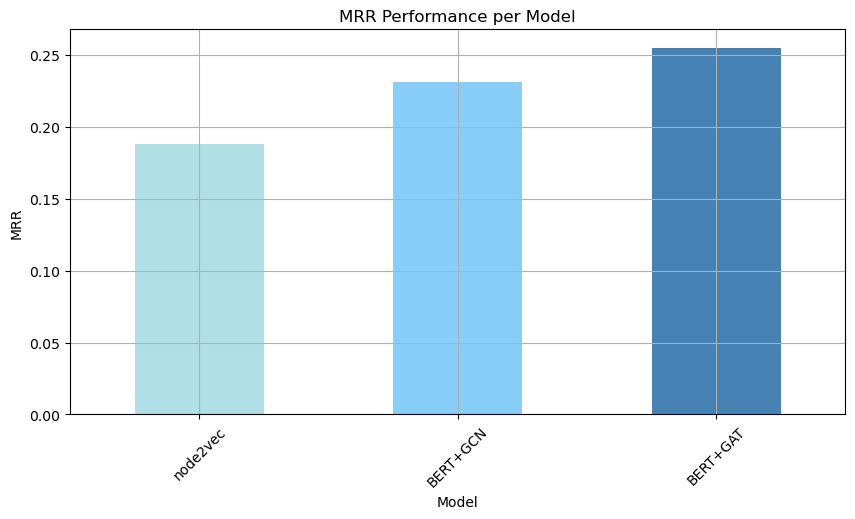

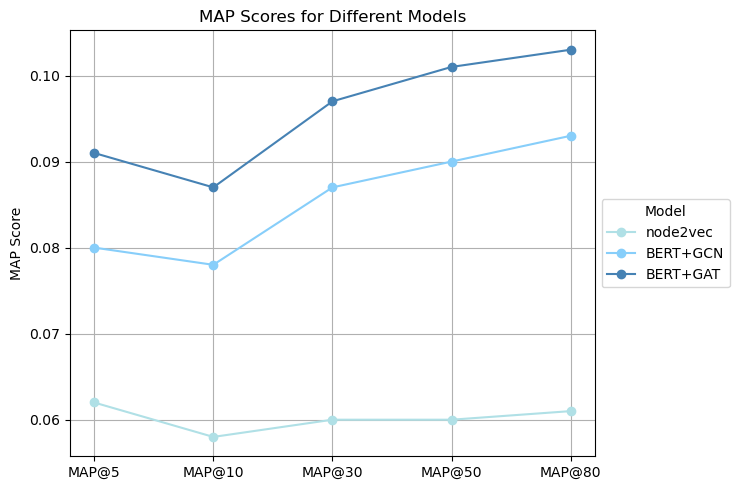

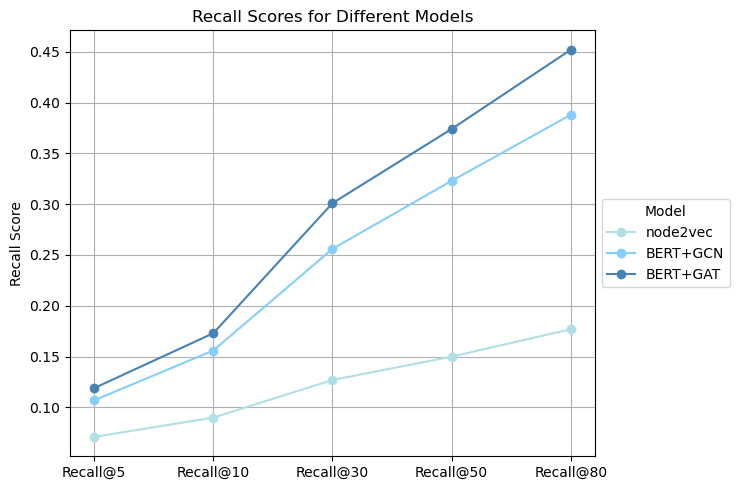

In [10]:
# Dictionary to hold the evaluation results of different models for comparison
models = {
    'node2vec': node2vec_result,  # evaluation metrics for the Node2Vec model
    'BERT+GCN': gcn_result,  # evaluation metrics for the BERT+GCN model
    'BERT+GAT': gat_result,  # evaluation metrics for the BERT+GAT model
}

# Generate the evaluation table for model comparison
evaluation_table = metric_evaluation_table(models)

# Print the evaluation table
print(evaluation_table)

# plot the model comparison
plot_result(evaluation_table)